In [75]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct

num1 = [2.171]
den1 = [1, 0.1512]

num2 = [0.0781, 9.636e-4]
den2 = [1, 19.38, 0.5134]

tdelay = 15
norder = 1
num3,den3 = ct.pade(tdelay, norder)

Kc = 1
tauI = 1
tauD = 1

In [86]:
Gv = ct.tf(num1, den1) # 频率->流量
Gy = ct.tf(num2, den2) # 流量->温度
Gt = ct.tf(num3, den3) # 延迟传递函数
Gc = Kc*ct.tf([tauI*tauD, tauI, 1], [tauI, 0]) # PID控制器
Hyr = Gc*Gv*Gy/(1+Gc*Gv*Gy) # 闭环传递函数

t = np.linspace(0,25,1000)
plt.figure(figsize=(12,6))
y,t = ct.matlab.step(Hyr,t)
plt.plot(t,y)

In [143]:
def sim(ref_input = 1, kp = 19.265, ki = 0.53265, kd = 12.3419, N = 8.7095):
    ti = kp/ki
    td = kd/kp
    Gc = kp*ct.tf([ti*td*(N+1), N*ti+td, N], [ti*td, N*ti, 0])
    Hyr = Gc*Gv*Gy/(1+Gc*Gv*Gy*Gt)
    t = np.linspace(0,450,1000)
    y,t = ct.matlab.step(ref_input*Hyr,t)
    plt.plot(t,y)
    plt.legend([f'Kp={kp:.2f}, Ki={ti:.2f}, Kd={td:.2f}'])

    max_response = np.max(y)
    final_response = y[-1]
    overshoot = (max_response - final_response) / final_response * 100
    print(f'Overshoot: {overshoot:.2f}%')

    error = ref_input - y
    ISE = np.trapz(error**2, t)
    print(f'ISE: {ISE:.2f}')

    rise_start = t[np.where(y >= 0.1 * final_response)[0][0]]
    rise_end = t[np.where(y >= 0.9 * final_response)[0][0]]
    rise_time = rise_end - rise_start
    print(f'Rise time: {rise_time:.2f} seconds')

    settling_value = [y[i:].mean() for i in range(len(y))]
    settling_start = t[np.where(y >= 0.98 * final_response)[0][0]]
    settling_end = t[np.where(y <= 1.02 * final_response)[0][-1]]
    settling_time = settling_end - settling_start
    print(f'Settling time: {settling_time:.2f} seconds')

Overshoot: 8.13%
ISE: 11.74
Rise time: 4.95 seconds
Settling time: 443.69 seconds


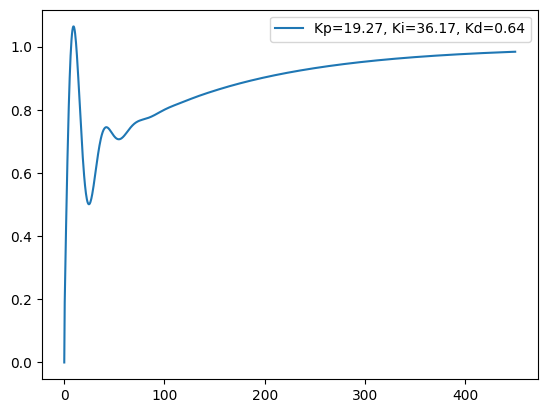

In [144]:
sim()

In [141]:
from ipywidgets import interact, fixed
interact(sim, kc=(0.1,50,0.1), ti=(0.1,50,0.1), td=(0.1,50,0.1))

interactive(children=(IntSlider(value=1, description='ref_input', max=3, min=-1), FloatSlider(value=19.265, de…

<function __main__.sim(ref_input=1, kp=19.265, ki=0.53265, kd=12.3419, N=8.7095)>